In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [3]:
np.random.seed(14)
n = 20
p = 2
k = 3
X = np.random.random((n,p))


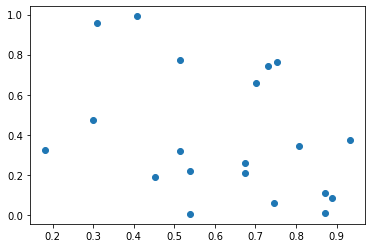

In [4]:
plt.scatter(X[:,0], X[:,1])

In [5]:
# init centers
# while not converged:
#   update cluster membership
#   update centers


In [8]:
# init centers
centers = X[np.random.choice(n, k, replace=False)]

In [11]:
# Eucledian Distance
((X[0] - centers[0])**2).sum()**0.5

0.5208284605891502

In [14]:
# difference between one particular center, numpy automatically makes 1d-array to 2-d array when used for subtraction from 2d-array

((X-centers[0])**2).sum(axis=1) # X is 2d array, centers[0]-1d array

array([0.27126229, 0.1157839 , 0.62541056, 0.08663739, 0.08608028,
       0.        , 0.18475782, 0.03526146, 0.01691859, 0.18006641,
       0.0579889 , 0.27402653, 0.02500186, 0.11015911, 0.39037498,
       0.07360213, 0.08193665, 0.16583048, 0.58022214, 0.14877818])

In [17]:
((X.reshape(n,1,p)-centers.reshape(1,k,p))**2).sum(axis=2)**5

array([[1.46874730e-03, 8.82780690e-02, 5.84850165e-02],
       [2.08085084e-05, 7.54023767e-12, 1.22669529e-10],
       [9.56810731e-02, 1.59719927e+00, 1.17454477e+00],
       [4.88120107e-06, 2.84748434e-04, 1.46461549e-04],
       [4.72626841e-06, 5.44716939e-05, 2.71517095e-05],
       [0.00000000e+00, 2.15999097e-06, 6.55728770e-07],
       [2.15285188e-04, 3.37709570e-05, 2.57568267e-05],
       [5.45131655e-08, 9.16687105e-07, 2.80419012e-07],
       [1.38618181e-09, 4.88392580e-06, 2.16228469e-06],
       [1.89305604e-04, 2.55790858e-02, 1.65645298e-02],
       [6.55728770e-07, 1.03292046e-15, 0.00000000e+00],
       [1.54512290e-03, 3.07558933e-02, 2.02493679e-02],
       [9.76925330e-09, 2.60537472e-06, 8.29595112e-07],
       [1.62219103e-05, 6.37387984e-03, 3.78286716e-03],
       [9.06587802e-03, 5.25426293e-02, 3.76360558e-02],
       [2.15999097e-06, 0.00000000e+00, 1.03292046e-15],
       [3.69309900e-06, 3.45959088e-09, 1.70854892e-09],
       [1.25407019e-04, 2.03397

In [21]:
distances = np.zeros((n,k))
for i in range(k):
    distances[:,i] = ((X-centers[i])**2).sum(axis=1)**0.5
distances

array([[0.52082846, 0.78448615, 0.75284308],
       [0.34027034, 0.07722155, 0.10206425],
       [0.79082903, 1.04793878, 1.01621817],
       [0.29434229, 0.44202429, 0.41359222],
       [0.29339441, 0.37464254, 0.34944571],
       [0.        , 0.27129713, 0.24080884],
       [0.42983464, 0.35715303, 0.34760758],
       [0.18778035, 0.24901305, 0.22119777],
       [0.13007146, 0.29435872, 0.27132592],
       [0.42434232, 0.6930882 , 0.66361762],
       [0.24080884, 0.03172537, 0.        ],
       [0.52347543, 0.70598071, 0.67708181],
       [0.15811976, 0.27643117, 0.24653956],
       [0.33190225, 0.60317091, 0.57250872],
       [0.62479995, 0.74481974, 0.72037795],
       [0.27129713, 0.        , 0.03172537],
       [0.28624578, 0.14252875, 0.13281978],
       [0.40722289, 0.67738348, 0.64749987],
       [0.76172314, 1.02691887, 0.99530078],
       [0.38571775, 0.44824302, 0.42589873]])

In [25]:
distances = cdist(X, centers) # It's same as the upper block but you can't modify it as before cell

In [27]:
closest = np.argmin(distances, axis=1)

In [30]:
X[closest == 0].mean(axis=0)

array([0.56588855, 0.50635366])

In [29]:
for i in range(k):
    centers[i,:] = X[closest == i].mean(axis=0)
centers

array([[0.56588855, 0.50635366],
       [0.87898257, 0.04569805],
       [0.71865081, 0.059445  ]])

In [42]:
np.random.seed(416)
centers = X[np.random.choice(n, k, replace=False)]
closest = np.zeros(n).astype(int)
while True:
    old_closest = closest.copy()
    print(closest)
    distances = cdist(X, centers)
    closest = np.argmin(distances, axis=1)

    for i in range(k):
        centers[i,:] = X[closest == i].mean(axis=0)

    if all(closest == old_closest):
        break

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 2 1 2 2 0 2 2 0 1 2 1 2 1 2 2 2 1 1 2]


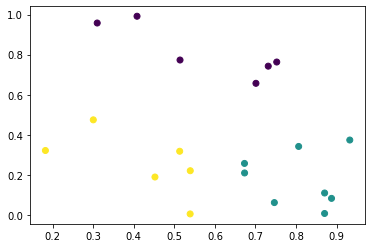

In [41]:
plt.scatter(X[:,0], X[:,1], c=closest)

In [43]:
def kmeans(X, k):
    n = X.shape[0]
    centers = X[np.random.choice(n, k, replace=False)]
    closest = np.zeros(n).astype(int)
    while True:
        old_closest = closest.copy()
        distances = cdist(X, centers)
        closest = np.argmin(distances, axis=1)

        for i in range(k):
            centers[i,:] = X[closest == i].mean(axis=0)

        if all(closest == old_closest):
            break
    
    return closest, centers

In [44]:
labels, centers = kmeans(X, 3)

In [45]:
print(labels)
print(centers)

[1 0 1 2 2 0 0 0 0 1 0 2 0 1 2 0 0 1 1 2]
[[0.77767175 0.16153858]
 [0.56944108 0.8141337 ]
 [0.39731074 0.30527733]]
